In [0]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

***Exploring The data***

In [0]:
df = pd.read_csv("stack-overflow-data.csv")

In [30]:
df = df[pd.notnull(df['tags'])]
print(df.head(10))
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

                                                post           tags
0  what is causing this behavior  in our c# datet...             c#
1  have dynamic html load as if it was in an ifra...        asp.net
2  how to convert a float value in to min:sec  i ...    objective-c
3  .net framework 4 redistributable  just wonderi...           .net
4  trying to calculate and print the mean and its...         python
5  how to give alias name for my website  i have ...        asp.net
6  window.open() returns null in angularjs  it wo...      angularjs
7  identifying server timeout quickly in iphone  ...         iphone
8  unknown method key  error in rails 2.3.8 unit ...  ruby-on-rails
9  from the include  how to show and hide the con...      angularjs
10286120


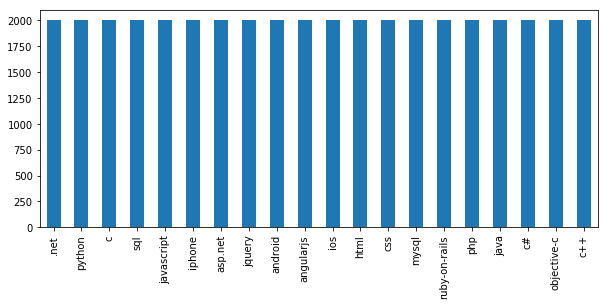

In [31]:
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

In [32]:
def print_plot(index):
  example = df[df.index == index][['post', 'tags']].values[0]
  if len(example) > 0:
    print(example[0])
    print('Tag:', example[1])

print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

In [33]:
print_plot(30)

how to chain expressions inside ngclass when using the {...}[] form  how can i add another expression to an <code>ng-class</code> directive that uses this form:   <pre><code>ng-class= {true: loading   false: loading-done }[data.loader===null]  </code></pre>   i d like to add something like this to the list:   <pre><code>{highlight:isspecial} </code></pre>   is it possible without expanding the first expression     thanks.
Tag: angularjs


***Cleaning the data(Text Pre-processing)***

In [36]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
  text = BeautifulSoup(text,"lxml").text #HTML Decoding
  text = text.lower() #lowercase text
  text = REPLACE_BY_SPACE_RE.sub(' ', text) # Replace symbols by space
  text = BAD_SYMBOLS_RE.sub(' ', text) # Delete bad symbols
  text = ' '.join(word for word in text.split() if word not in STOPWORDS) #Delete stopwords from text
  return text

df['post'] = df['post'].apply(clean_text)
print_plot(10)

need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes response write myclass second class using interface class myclass2 idemo public void show function body comes response write myclass2 response write two classes function name different body even achieved without interface need interface use
Tag: c#


In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

3880052


In [0]:
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
              ('tfidf', TfidfTransformer()),
              ('clf', MultinomialNB()),
              ])

nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('Accuracy %s' %accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=my_tags))

Accuracy 0.70160481444333
               precision    recall  f1-score   support

         java       0.68      0.63      0.66       223
         html       0.92      0.85      0.88       205
      asp.net       0.59      0.97      0.73       199
           c#       0.79      0.69      0.74       203
ruby-on-rails       0.81      0.75      0.78       203
       jquery       0.68      0.57      0.62       194
        mysql       0.67      0.79      0.72       199
          php       0.57      0.97      0.72       180
          ios       0.57      0.36      0.44       171
   javascript       0.61      0.58      0.59       207
       python       0.63      0.53      0.57       211
            c       0.82      0.68      0.74       192
          css       0.91      0.48      0.63       224
      android       0.69      0.71      0.70       200
       iphone       0.53      0.91      0.67       183
          sql       0.69      0.65      0.67       209
  objective-c       0.70      0.78    

***Linear Support Vector Machines***

In [0]:
from sklearn.linear_model import SGDClassifier
sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3,
                                    random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [0]:
y_pred = sgd.predict(X_test)

print("Accuracy %s" % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=my_tags))

Accuracy 0.7836008024072216
               precision    recall  f1-score   support

         java       0.78      0.65      0.71       223
         html       0.87      0.95      0.90       205
      asp.net       0.92      0.97      0.94       199
           c#       0.80      0.82      0.81       203
ruby-on-rails       0.78      0.83      0.80       203
       jquery       0.74      0.46      0.57       194
        mysql       0.84      0.72      0.78       199
          php       0.68      0.97      0.80       180
          ios       0.76      0.43      0.55       171
   javascript       0.69      0.58      0.63       207
       python       0.68      0.64      0.66       211
            c       0.84      0.81      0.82       192
          css       0.81      0.83      0.82       224
      android       0.85      0.82      0.84       200
       iphone       0.79      0.83      0.81       183
          sql       0.66      0.69      0.67       209
  objective-c       0.73      0.88  

***Logistic Regression***

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', LogisticRegression(n_jobs=1,C=1e5)),
                  ])

logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [0]:
y_pred = logreg.predict(X_test)

print("Accuracy %s" % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=my_tags))

Accuracy 0.7662988966900702
               precision    recall  f1-score   support

         java       0.67      0.64      0.65       223
         html       0.92      0.90      0.91       205
      asp.net       0.95      0.96      0.96       199
           c#       0.82      0.76      0.79       203
ruby-on-rails       0.80      0.79      0.80       203
       jquery       0.56      0.60      0.58       194
        mysql       0.78      0.71      0.74       199
          php       0.63      0.87      0.73       180
          ios       0.62      0.61      0.62       171
   javascript       0.63      0.62      0.62       207
       python       0.65      0.59      0.62       211
            c       0.85      0.74      0.79       192
          css       0.83      0.75      0.79       224
      android       0.85      0.82      0.84       200
       iphone       0.78      0.78      0.78       183
          sql       0.63      0.67      0.65       209
  objective-c       0.76      0.82  

***Word2Vec and Logistics Regression***

In [0]:
from gensim import models

wv = models.KeyedVectors.load_word2vec_format(
    '/content/drive/My Drive/GoogleNews-vectors-negative300.bin', binary=True)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
from itertools import islice
list(islice(wv.vocab, 13030,13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [0]:
def word_averaging(wv, words):
  all_words, mean = set(), []
  
  for word in words:
    if isinstance(word,np.ndarray):
      mean.append(word)
    elif word in wv.vocab:
      mean.append(wv.syn0[wv.vocab[word].index])
      all_words.add(wv.vocab[word].index)
  if not mean:
    logging.warning("cannot compute similarity with no inputs %s", words)
    return np.zeros(wv.vector_size)
  
  mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
  return mean

def word_averaging_list(wv, text_list):
  return np.vstack([word_averaging(wv, post) for post in text_list])

In [0]:
def w2v_tokenize_text(text):
  tokens = []
  for sent in nltk.sent_tokenize(text, language='english'):
    for word in nltk.word_tokenize(sent, language='english'):
      if len(word)< 2:
        continue
      tokens.append(word)
  return tokens 

In [0]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values

X_train_word_average = word_averaging_list(wv, train_tokenized)
X_test_word_average = word_averaging_list(wv, test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['tags'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' %accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred, target_names=my_tags))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.6241223671013039
               precision    recall  f1-score   support

         java       0.57      0.54      0.56       223
         html       0.71      0.76      0.73       205
      asp.net       0.72      0.79      0.75       199
           c#       0.69      0.65      0.67       203
ruby-on-rails       0.72      0.70      0.71       203
       jquery       0.41      0.39      0.40       194
        mysql       0.63      0.60      0.62       199
          php       0.68      0.77      0.72       180
          ios       0.49      0.49      0.49       171
   javascript       0.47      0.48      0.48       207
       python       0.49      0.48      0.49       211
            c       0.61      0.57      0.59       192
          css       0.72      0.62      0.67       224
      android       0.51      0.57      0.54       200
       iphone       0.67      0.75      0.71       183
          sql       0.49      0.47      0.48       209
  objective-c       0.59      0.68  

***Doc2Vec And Logistic Regression***

In [0]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df.post, df.tags, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [0]:
all_data[:2]

[TaggedDocument(words=['trace', 'net', 'code', 'deployed', 'remote', 'server', 'hii', 'deployed', 'application', 'remote', 'server', 'error', 'occures', 'runs', 'server', 'need', 'trace', 'server', 'side', 'code', 'vs', 'net', 'server', 'client', 'machine', 'way', 'trace', 'code', 'client'], tags=['Train_0']),
 TaggedDocument(words=['get', 'many', 'sattelites', 'view', 'android', '2', '1', 'sdk', 'get', 'count', 'satellites', 'android', '2', '1', 'ever', 'using', 'loction', 'getextras', 'getint', 'satellites', 'app', 'automatically', 'closed', 'please', 'one', 'help', 'resolve', 'one', 'thing', 'android', '1', '5', 'working', 'fine'], tags=['Train_1'])]

In [0]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epochs in range(30):
  model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
  model_dbow.alpha -= 0.002
  model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 13292/13292 [00:00<00:00, 2357223.32it/s]


In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
  vectors = np.zeros((corpus_size, vectors_size))
  for i in range(0, corpus_size):
    prefix = vectors_type + '_' + str(i)
    vectors[i] = model.docvecs[prefix]
  return vectors

train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [0]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.7033600802407222
               precision    recall  f1-score   support

         java       0.53      0.58      0.55       208
         html       0.77      0.75      0.76       192
      asp.net       0.92      0.89      0.91       197
           c#       0.72      0.64      0.68       209
ruby-on-rails       0.68      0.70      0.69       181
       jquery       0.62      0.59      0.61       204
        mysql       0.76      0.72      0.74       214
          php       0.69      0.72      0.70       209
          ios       0.50      0.62      0.55       180
   javascript       0.62      0.54      0.58       203
       python       0.58      0.59      0.58       192
            c       0.75      0.80      0.77       197
          css       0.74      0.73      0.73       197
      android       0.80      0.72      0.76       196
       iphone       0.76      0.76      0.76       207
          sql       0.63      0.64      0.63       212
  objective-c       0.79      0.75  

***BOW with Keras***

In [0]:
import itertools
import os

import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [0]:
train_size = int(len(df) * .7)
train_posts = df['post'][:train_size]
train_tags = df['tags'][:train_size]

In [0]:
test_posts = df['post'][train_size:]
test_tags = df['tags'][train_size:]

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) 

In [0]:
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [0]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [0]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [58]:
history = model.fit(x_train, y_train, batch_size=32, epochs=3,
                   verbose=1, validation_split=0.1)

Train on 25200 samples, validate on 2800 samples
Epoch 1/3
25200/25200 [==============================] - 10s 381us/step - loss: 0.9793 - acc: 0.7263 - val_loss: 0.6331 - val_acc: 0.8129
Epoch 2/3
25200/25200 [==============================] - 9s 370us/step - loss: 0.5353 - acc: 0.8301 - val_loss: 0.6099 - val_acc: 0.8146
Epoch 3/3
25200/25200 [==============================] - 9s 367us/step - loss: 0.4399 - acc: 0.8567 - val_loss: 0.6098 - val_acc: 0.8121


In [59]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('Test accuracy:', score[1])

12000/12000 [==============================] - 1s 66us/step
Test accuracy: 0.8046666666666666
